Simulation of the strategy contained in the paper

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('simulation.csv').set_index('Time')
df.head()

,Y,Y_hat
Time,,
2017-12-15 07:20:00,17044.322063,17075.027241
2017-12-15 07:25:00,17054.952232,17082.913974
2017-12-15 07:30:00,17095.091236,17077.251377
2017-12-15 07:35:00,17149.516926,17046.794758
2017-12-15 07:40:00,17169.485833,17121.170052


In [3]:
df = pd.read_csv('Data/LSTM_prediction.csv', sep='\t').set_index('Unnamed: 0')
df['Y'] = df['y_test']
df['Y_hat'] = df['test_predict']
df.drop(columns=['test_predict', 'y_test'], inplace=True)
df.head()

,Y,Y_hat
Unnamed: 0,,
0,17183.483805,17243.880859
1,17120.843142,17270.644531
2,17117.669832,17207.255859
3,17106.030414,17204.205078
4,17064.157187,17194.009766


In [4]:
# df['Y_hat_change'] = df['Y_hat'] - df['Y'].shift(1)
df['Y_hat_change'] = df['Y_hat'].diff()
df['Y_change'] = df['Y'].diff().shift()
df = df[2:]
df.index = np.arange(len(df['Y']))
df.head()

,Y,Y_hat,Y_hat_change,Y_change
0,17117.669832,17207.255859,-63.388672,-62.640663
1,17106.030414,17204.205078,-3.050781,-3.173310
2,17064.157187,17194.009766,-10.195312,-11.639419
3,17075.724313,17153.039062,-40.970703,-41.873227
4,17054.324380,17164.937500,11.898438,11.567126


In [5]:
bins = [-np.inf, -100, -50, -10, 10, 50, 100, np.inf]
labels = [-3, -2, -1, 0, 1, 2, 3]
df['Y_hat_classification'] = pd.cut(df['Y_hat_change'], bins=bins, labels=labels).astype('int64')
df['Y_classification'] = pd.cut(df['Y_change'], bins=bins, labels=labels).astype('int64')
print("Classification: ", *zip(['<-100', '<-50', '<-10', '>-10 & <10', '>10', '>50', '>100'], labels), sep='\n')
print("Classification accuracy: ", accuracy_score(df['Y_classification'], df['Y_hat_classification']))
df.head(50)

Classification: 
('<-100', -3)
('<-50', -2)
('<-10', -1)
('>-10 & <10', 0)
('>10', 1)
('>50', 2)
('>100', 3)
Classification accuracy:  0.9077530509691314


,Y,Y_hat,Y_hat_change,Y_change,Y_hat_classification,Y_classification
0,17117.669832,17207.255859,-63.388672,-62.640663,-2,-2
1,17106.030414,17204.205078,-3.050781,-3.173310,0,0
2,17064.157187,17194.009766,-10.195312,-11.639419,-1,-1
3,17075.724313,17153.039062,-40.970703,-41.873227,-1,-1
4,17054.324380,17164.937500,11.898438,11.567126,1,1
5,17044.322063,17138.742188,-26.195312,-21.399933,-1,-1
6,17054.952232,17126.669922,-12.072266,-10.002317,-1,-1
7,17095.091236,17138.335938,11.666016,10.630169,1,1
8,17149.516926,17186.320312,47.984375,40.139004,1,1
9,17169.485833,17235.931641,49.611328,54.425690,1,2


In [6]:
def invest(prediction_classes, buy, sell):
    decision = []
    for p in prediction_classes:
        if (p <= sell):
            decision.append(-1)
        elif (p >= buy):
            decision.append(1)
        else:
            decision.append(0)
    return decision

In [7]:
strategy = invest(df['Y_hat_classification'], 1, -1)
returns = []
owned = True
for i in range(len(strategy)):
    if i==0:
        returns.append(-df['Y'][0])
    elif (strategy[i]==1 and not owned):
        returns.append(-df['Y'][i-1])
        owned = True
    elif (strategy[i]==-1 and owned):
        returns.append(df['Y'][i-1])
        owned = False
    else:
        returns.append(0)
        
print("Total profit: ", np.sum(returns))
print("Average return per 5 mins: ", (np.sum(returns))/len(returns))

df['Invest1'] = returns
df['Returns1'] = np.cumsum(returns)

Total profit:  77440.5693548601
Average return per 5 mins:  3.0884808708167864


In [8]:
strategy = invest(df['Y_hat_classification'], 2, -2)
returns = []
owned = True
for i in range(len(strategy)):
    if i==0:
        returns.append(-df['Y'][0])
    elif (strategy[i]==1 and not owned):
        returns.append(-df['Y'][i-1])
        owned = True
    elif (strategy[i]==-1 and owned):
        returns.append(df['Y'][i-1])
        owned = False
    else:
        returns.append(0)
        
print("Total profit: ", np.sum(returns))
print("Average return per 5 mins: ", (np.sum(returns))/len(returns))

df['Invest2'] = returns
df['Returns2'] = np.cumsum(returns)

Total profit:  34422.35237470005
Average return per 5 mins:  1.3728305166586923


In [9]:
strategy = invest(df['Y_hat_classification'], 3, -3)
returns = []
owned = True
for i in range(len(strategy)):
    if i==0:
        returns.append(-df['Y'][0])
    elif (strategy[i]==1 and not owned):
        returns.append(-df['Y'][i-1])
        owned = True
    elif (strategy[i]==-1 and owned):
        returns.append(df['Y'][i-1])
        owned = False
    else:
        returns.append(0)
        
print("Total profit: ", np.sum(returns))
print("Average return per 5 mins: ", (np.sum(returns))/len(returns))

df['Invest3'] = returns
df['Returns3'] = np.cumsum(returns)

Total profit:  9642.847360500058
Average return per 5 mins:  0.38457555078966493


Graph of Strategy Returns:


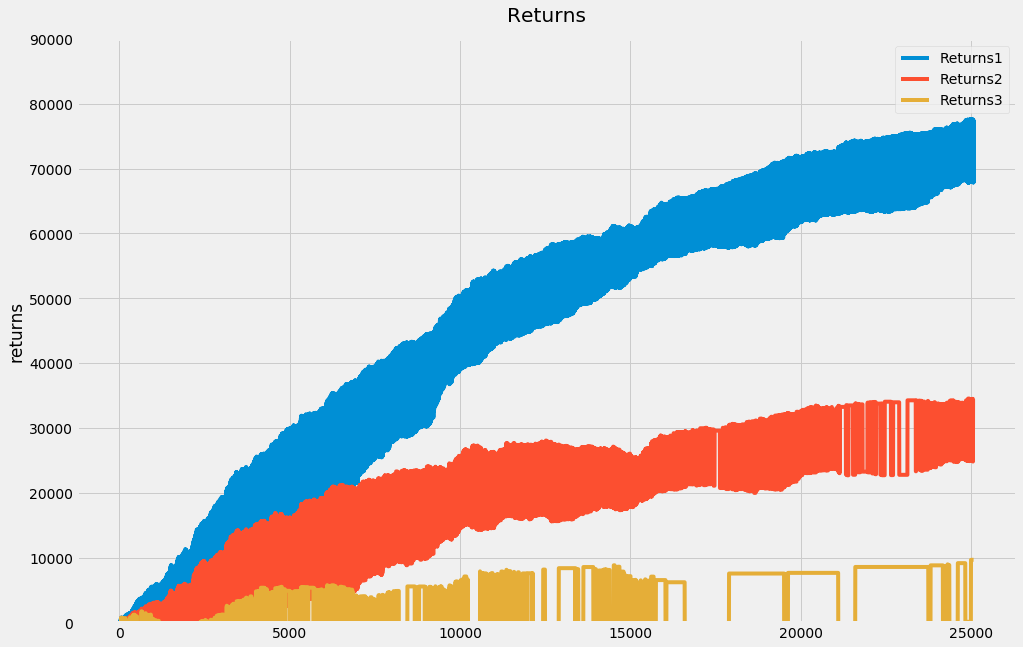

In [10]:
plt.style.use('fivethirtyeight')
df[['Returns1', 'Returns2', 'Returns3']].apply(lambda x: x).plot(figsize=(15,10))
plt.ylabel('returns')
plt.ylim((0, 90000))
plt.title("Returns", y=1.02)
print('Graph of Strategy Returns:')

In [11]:
df.head(20)

,Y,Y_hat,Y_hat_change,Y_change,Y_hat_classification,Y_classification,Invest1,Returns1,Invest2,Returns2,Invest3,Returns3
0,17117.669832,17207.255859,-63.388672,-62.640663,-2,-2,-17117.669832,-17117.669832,-17117.669832,-17117.669832,-17117.669832,-17117.669832
1,17106.030414,17204.205078,-3.050781,-3.173310,0,0,0.000000,-17117.669832,0.000000,-17117.669832,0.000000,-17117.669832
2,17064.157187,17194.009766,-10.195312,-11.639419,-1,-1,17106.030414,-11.639419,0.000000,-17117.669832,0.000000,-17117.669832
3,17075.724313,17153.039062,-40.970703,-41.873227,-1,-1,0.000000,-11.639419,0.000000,-17117.669832,0.000000,-17117.669832
4,17054.324380,17164.937500,11.898438,11.567126,1,1,-17075.724313,-17087.363732,0.000000,-17117.669832,0.000000,-17117.669832
5,17044.322063,17138.742188,-26.195312,-21.399933,-1,-1,17054.324380,-33.039352,0.000000,-17117.669832,0.000000,-17117.669832
6,17054.952232,17126.669922,-12.072266,-10.002317,-1,-1,0.000000,-33.039352,0.000000,-17117.669832,0.000000,-17117.669832
7,17095.091236,17138.335938,11.666016,10.630169,1,1,-17054.952232,-17087.991584,0.000000,-17117.669832,0.000000,-17117.669832
8,17149.516926,17186.320312,47.984375,40.139004,1,1,0.000000,-17087.991584,0.000000,-17117.669832,0.000000,-17117.669832
9,17169.485833,17235.931641,49.611328,54.425690,1,2,0.000000,-17087.991584,0.000000,-17117.669832,0.000000,-17117.669832
